In [107]:
import random
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE

In [2]:
bert_path = "data/biasbios/vectors_extracted_from_trained_models/google_multiberts-seed_{0}/seed_{0}/{1}.vectors_raw_bert.pt"
contriever_path = "data/biasbios/vectors_extracted_from_trained_models/contriever/seed_{0}/{1}.vectors_raw_contriever_new.pt"

In [3]:
seeds = range(25)
splits = ["train", "dev", "test"]

In [188]:
data_path = bert_path

In [184]:
#linalg norms
data = []
for seed in seeds:
    train_vec = torch.load(data_path.format(seed, "train"))
    all_norms = torch.norm(train_vec["X"], dim=1)
    var, mean = torch.var_mean(all_norms, unbiased=True)
    print(f"Seed {seed}")
    print(f"Mean: {mean.data} Var: {var.data}")
    data.append([seed, mean.item(), var.item()])
    

Seed 0
Mean: 13.934098243713379 Var: 0.08585573732852936
Seed 1
Mean: 15.430900573730469 Var: 0.12761592864990234
Seed 2
Mean: 15.459710121154785 Var: 0.3333010673522949
Seed 3
Mean: 14.350279808044434 Var: 0.11329010874032974
Seed 4
Mean: 13.36888599395752 Var: 0.12757481634616852
Seed 5
Mean: 12.95253849029541 Var: 0.17012757062911987
Seed 6
Mean: 14.309813499450684 Var: 0.12130849063396454
Seed 7
Mean: 12.992856979370117 Var: 0.3402177393436432
Seed 8
Mean: 14.500707626342773 Var: 0.056554440408945084
Seed 9
Mean: 14.617816925048828 Var: 0.10911401361227036
Seed 10
Mean: 17.069948196411133 Var: 0.5639026761054993
Seed 11
Mean: 13.000509262084961 Var: 0.20168247818946838
Seed 12
Mean: 13.56882095336914 Var: 0.1447545886039734
Seed 13
Mean: 15.251769065856934 Var: 0.0696294829249382
Seed 14
Mean: 13.688384056091309 Var: 0.1994861662387848
Seed 15
Mean: 13.094922065734863 Var: 0.07391868531703949
Seed 16
Mean: 13.710134506225586 Var: 0.12887375056743622
Seed 17
Mean: 14.388967514038086

In [185]:
df = pd.DataFrame(data=data, columns=["seed", "mean", "var"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

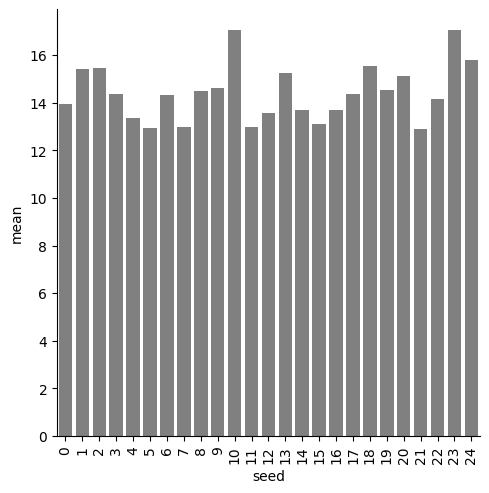

In [187]:
myplot = sns.catplot(data=df, x="seed", y="mean", kind="bar", color="gray")
plt.xticks(rotation=90)

In [140]:
# grab one random index and save it across seeds
data_path = contriever_path
random_samples = dict.fromkeys(seeds)
rand_idxs = None
# rand_idxs = torch.tensor([197558, 158552, 237978, 194314, 165599, 253627,  83390, 248060, 215796,
#          56623, 142230, 199334, 174667, 226009, 179572, 168534, 182872, 201401,
#          17298,  68231,  25322,  31996, 194828,  35012, 226387, 249757,  77779,
#         252068, 209802, 124255, 101527, 200509, 209990, 132131, 181713, 182756,
#         246683,  60728, 236651, 235025, 207901, 151757, 225196, 202266, 172113,
#         208746,  56500, 128289,  22210, 165611]).cuda()

for seed in seeds:
    train_vec = torch.load(data_path.format(seed, "train"))
    if rand_idxs is None:
        rand_idxs = torch.randint(len(train_vec["X"]), (20000,)).cuda()
    random_samples[seed] = train_vec["X"][rand_idxs]

torch.Size([2000, 768])

In [ ]:
### visualise maybe 50 words per model

In [141]:
#len(random_samples[0])
vecs, labels = [], []
x, y = [], []

In [205]:
# normal TSNE over all vecs in all seeds
for seed in seeds:
        vecs.extend(random_samples[seed].cpu().numpy())
        labels.extend([str(seed)]*50)

In [142]:
# special PCA to isolate 13
vecs.extend(random_samples[17].cpu().numpy())
labels.extend([str(17)]*20000)
vecs.extend(random_samples[13][:100].cpu().numpy())
labels.extend([str(13)]*100)
vecs.extend(random_samples[16][:100].cpu().numpy())
labels.extend([str(16)]*100)

In [ ]:

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
new_values = tsne_model.fit_transform(np.array(vecs))


In [145]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])


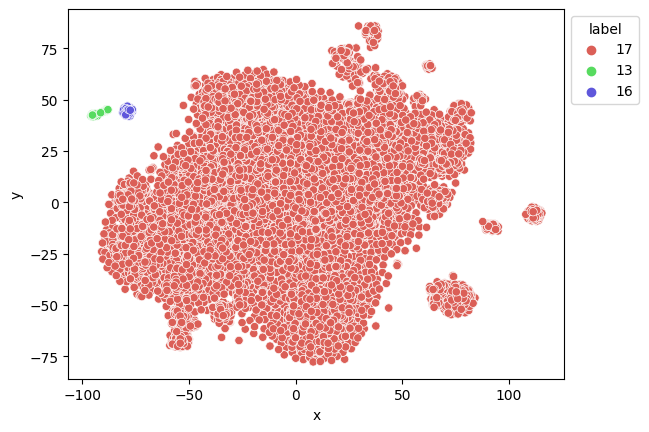

In [146]:
df = pd.DataFrame({'x': x, "y": y, "label": labels})

num_categories = len(set(df["label"]))
mask = df["label"] == "10"
df = df[~mask]
myplot = sns.scatterplot(data=df,
                            x="x", y="y", hue='label',
                            legend="full",
                            palette=sns.color_palette("hls", n_colors=num_categories))
sns.move_legend(myplot, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
for seed in seeds:
    print(seed)
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=0)
    new_values = tsne_model.fit_transform(random_samples[seed].cpu().numpy())
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    df = pd.DataFrame({'x': x, "y": y})
    myplot = sns.scatterplot(data=df, x="x", y="y")
    plt.show()
    plt.clf()

(2000, 2)

In [210]:
### Mean and var of cos_sim with random other vecs in _same_ seed vs. the _same_ vec in random different seed

In [94]:
def get_other_seed_vecs(this_seed, seeds, idxs):
    other_vecs = []
    for idx in idxs:
        other_seed = random.choice([s for s in seeds if s != this_seed])
        #if other_seed not in set(seed2vecs.keys()):
        #    seed2vecs[seed] = torch.load(data_path.format(other_seed, "train"))["X"].cpu().numpy()
        vec = seed2vecs[other_seed][idx]
        other_vecs.append(vec)
    return torch.tensor(other_vecs).cuda()

In [91]:
data_path = contriever_path

In [92]:
seed2vecs = {}
for seed in seeds:
    seed2vecs[seed] = torch.load(data_path.format(seed, "train"))["X"].cpu().numpy()

In [93]:
seed2sim = {}
seed2dot = {}
data = []

In [95]:
n=1000
Cosine = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
# take 2k words per seeds and get metrics
rand_idxs = None
for seed in seeds:
    train_vec = torch.load(contriever_path.format(seed, "train"))["X"]
    if rand_idxs is None:
        rand_idxs = torch.randint(len(train_vec), (n*2,))
        target_idxs, rand_self_idxs = rand_idxs[:n].cuda(), rand_idxs[n:].cuda()
    self_seed_sims = Cosine(train_vec[target_idxs], train_vec[rand_self_idxs])
    other_vecs = get_other_seed_vecs(seed, seeds, target_idxs)
    other_seed_sims = Cosine(train_vec[target_idxs], other_vecs)
    seed2sim[seed] = {
        "self": self_seed_sims,
        "other": other_seed_sims
    }
    self_dot = torch.diagonal(torch.matmul(train_vec[target_idxs],train_vec[rand_self_idxs].T))
    other_dot =  torch.diagonal(torch.matmul(train_vec[target_idxs], other_vecs.T))
    seed2dot[seed] = {
        "self": self_dot,
        "other": other_dot
    }
    #stats
    var, mean = torch.var_mean(self_seed_sims)
    data.append([seed, mean.item(), var.item(), "self", "cos"])
    var, mean = torch.var_mean(other_seed_sims)
    data.append([seed, mean.item(), var.item(), "other", "cos"])
    var, mean = torch.var_mean(self_dot)
    data.append([seed, mean.item(), var.item(), "self", "dot"])
    var, mean = torch.var_mean(other_dot)
    data.append([seed, mean.item(), var.item(), "other", "dot"])

In [96]:
df = pd.DataFrame(data=data, columns=["seed", "mean", "var", "comparison", "metric"])

In [101]:
mask = df["metric"] == "dot"
this_df = df[~mask]
mask = this_df["seed"] == 13
this_df = this_df[~mask]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24')])

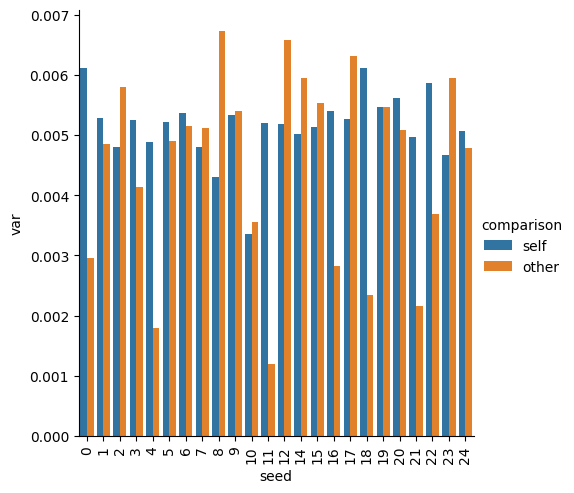

In [103]:
myplot = sns.catplot(data=this_df, x="seed", y="var", kind="bar", hue="comparison")
plt.xticks(rotation=90)

In [41]:
seed2vecs.keys()

dict_keys([0])

In [13]:
seed2sim

{0: {'self': tensor([0.2041, 0.0818, 0.0881, 0.1718, 0.3490, 0.3086, 0.1921, 0.1794, 0.1598,
          0.3780], device='cuda:0'),
  'other': tensor([-0.0588,  0.0320,  0.0315, -0.0364,  0.0508, -0.0057, -0.0749, -0.0714,
          -0.0137, -0.0114], device='cuda:0')}}

In [19]:
train_vec[target_idxs]

tensor([[-0.0076,  0.0290, -0.0032,  ...,  0.0172,  0.0046,  0.0277],
        [ 0.0004, -0.0001,  0.0029,  ..., -0.0372, -0.0620,  0.0273],
        [-0.0335,  0.0215,  0.0391,  ..., -0.0617, -0.0512,  0.0189],
        ...,
        [ 0.0602, -0.0188,  0.0230,  ..., -0.0951, -0.0436, -0.0146],
        [-0.0423, -0.0369, -0.0333,  ..., -0.0825,  0.0006, -0.0197],
        [-0.0285,  0.0151,  0.0225,  ..., -0.0698, -0.0155, -0.0828]],
       device='cuda:0')

In [20]:
other_vecs

tensor([[-0.0969,  0.0195, -0.0189,  ...,  0.0374,  0.0088, -0.0192],
        [ 0.0576,  0.0103, -0.0045,  ...,  0.0455, -0.0247,  0.0669],
        [ 0.0463, -0.0312, -0.0737,  ...,  0.0250,  0.0277,  0.0969],
        ...,
        [-0.0329,  0.0146,  0.0261,  ..., -0.0415, -0.0065,  0.0585],
        [-0.0709, -0.0480,  0.1711,  ..., -0.1324, -0.0509,  0.0718],
        [ 0.0299,  0.0683,  0.0548,  ..., -0.0360,  0.0267, -0.0199]],
       device='cuda:0')

In [32]:
torch.dot(train_vec[target_idxs][1],other_vecs[1])

tensor(-0.0053, device='cuda:0')

In [28]:
train_vec[target_idxs][0].shape, other_vecs[0].shape

(torch.Size([768]), torch.Size([768]))

In [33]:
torch.diagonal(torch.matmul(train_vec[target_idxs], other_vecs.T))

tensor([ 0.1594, -0.0053, -0.0428,  0.0650, -0.0191,  0.0436,  0.0758,  0.0201,
        -0.0623, -0.0049], device='cuda:0')

In [217]:
Cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

In [224]:
Cos(train_vec["X"][:10],train_vec["X"][10:20])

tensor([0.7987, 0.8544, 0.7973, 0.8416, 0.8664, 0.7906, 0.8329, 0.7769, 0.7643,
        0.7674])

In [225]:
Cos(train_vec["X"][:2],train_vec["X"][10:12])

tensor([0.7987, 0.8544])